# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [20]:
# Import relevant libraries
from splinter import Browser
from selenium import webdriver
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import pandas as pd
import os


In [21]:
curr_dir = os.getcwd()
chromedriver_path = os.path.join(curr_dir,'..','chromedriver.exe')
chrome_options = webdriver.ChromeOptions()

browser = webdriver.Chrome(executable_path=chromedriver_path,chrome_options=chrome_options)

C:\Users\mille\AppData\Local\Temp\ipykernel_7892\3577285208.py:5: DeprecationWarning: use options instead of chrome_options
  browser = webdriver.Chrome(executable_path=chromedriver_path,chrome_options=chrome_options)


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [22]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.get(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [23]:
# Create a Beautiful Soup Object
html = browser.page_source
soup = BeautifulSoup(html,'html.parser')

In [24]:
# Extract all rows of data
rows = soup.find_all('tr',class_='data-row')
print(rows)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [31]:
# Create an empty list
list_rows = [[i.text for i in row.find_all('td')] for row in soup.find_all('tr',class_='data-row')]
# Loop through the scraped data to create a list of rows
list_rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [32]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id','terestial_date','sol','ls','month','min_temp','pressure']
weather_df = pd.DataFrame(list_rows,columns = columns)

In [33]:
# Confirm DataFrame was created successfully
weather_df.head()

,id,terestial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [28]:
# Examine data type of each column
weather_df.dtypes

id                object
terestial_date    object
sol               object
ls                object
month             object
min_temp          object
pressure          object
dtype: object

In [36]:
# Change data types for data analysisweather_df.sol.astype('int')
weather_df.sol= weather_df.sol.astype('int')
weather_df.ls = weather_df.ls.astype('int')
weather_df.month = weather_df.month.astype('int')

weather_df.terrestial_date = pd.to_datetime(weather_df.terrestial_date)


weather_df.min_temp = weather_df.min_temp.astype('float')
weather_df = weather_df.pressure.astype('float')

AttributeError: 'DataFrame' object has no attribute 'terrestial_date'

In [30]:
# Confirm type changes were successful by examining data types again
weather_df.dtypes

dtype('int32')

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [37]:
# 1. How many months are there on Mars?
weather_df.month.value_counts().sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [38]:
# 2. How many Martian days' worth of data are there?
weather_df.sol.nunique()

1867

In [39]:
# 3. What is the average low temperature by month?
mt = weather_df.groupby('month').min_temp.mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
# Plot the average temperature by month
mt.plot(kind='bar')


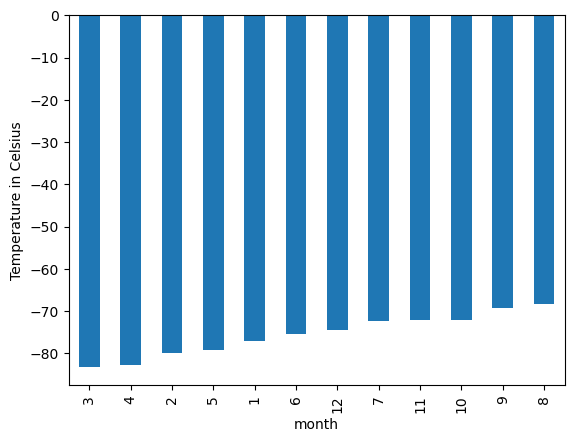

In [16]:
# Identify the coldest and hottest months in Curiosity's location


In [40]:
# 4. Average pressure by Martian month
pressure_per_month = weather_df.groupby('month').pressure.mean()

TypeError: agg function failed [how->mean,dtype->object]

In [41]:
# Plot the average pressure by month
pressure_per_month.plot(kind= 'bar')

NameError: name 'pressure_per_month' is not defined

<Axes: >

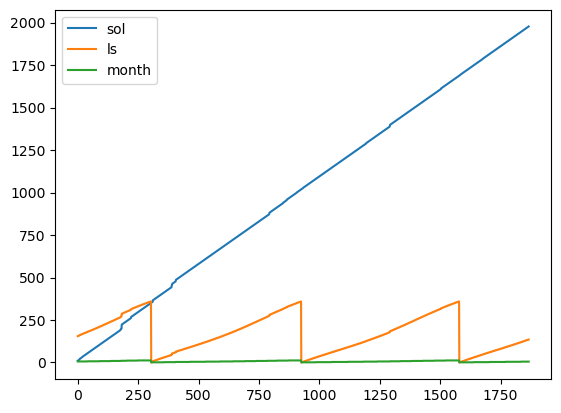

In [42]:
# 5. How many terrestrial (earth) days are there in a Martian year?
weather_df.plot()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [43]:
# Write the data to a CSV
weather_df.to_csv('mars_weather.csv',index =False)

In [44]:
browser.quit()